In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from statsmodels.tsa.arima_model import ARIMA

In [3]:
data = pandas.read_csv('timeData.csv')
print (data.head())

   30-03-17  31-03-17  01-04-17  02-04-17
0      54.1      54.2     54.30      54.4
1      52.5      53.0     52.00      53.0
2      54.0      54.0     54.00      54.0
3      52.0      52.0     52.67      52.0
4      52.0      52.0     51.34      52.0


In [4]:
Day1 = data['30-03-17']
Day2 = data['31-03-17']
Day3 = data['01-04-17']
Day4 = data['02-04-17']

In [5]:
holeData = data.as_matrix()[:,0:].T

In [6]:
train_X = numpy.array(holeData)

In [7]:
ii = numpy.mean(holeData, axis=0)
jj = [ii]+[ii]+[ii]+[ii]
meanDataTrain = numpy.array(jj).ravel()

In [8]:
history = [x for x in train_X.ravel()]
predictions = list()
for t in range(len(train_X.ravel())):
    model = ARIMA(history, order=(4,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = train_X.ravel()[t]
    history.append(obs)

In [9]:
numpy.array(predictions).ravel()

array([ 52.50853135,  53.83100365,  52.33355751,  54.38155057,
        51.9694266 ,  50.66615289,  51.62922464,  49.03705061,
        49.37500525,  53.3498593 ,  55.87637242,  55.7518658 ,
        56.89678101,  58.72471033,  60.11129395,  61.51403944,
        62.93661255,  64.35801048,  65.77819258,  67.19726901,
        66.6384467 ,  61.37980226,  57.47306037,  55.29034153,
        52.39118654,  53.94039254,  53.16494866,  54.29681107,
        51.57955424,  50.90423614,  51.62535212,  49.05603525,
        49.42207109,  53.22278701,  55.90071061,  55.66163321,
        56.5908359 ,  58.8054837 ,  60.20507842,  61.4589189 ,
        62.90807474,  64.33753873,  65.75497991,  67.17155142,
        66.09065525,  62.47744863,  56.97763951,  54.88823968,
        52.73504094,  54.08492951,  51.56519314,  54.25088454,
        53.46880215,  49.60531949,  48.93571345,  49.80242476,
        50.32850533,  53.0607118 ,  55.82177126,  55.7389943 ,
        56.11017779,  58.81353059,  60.41921405,  61.37

In [10]:
test_X = ([ 52.50853135,  53.83100365,  52.33355751,  54.38155057,
        51.9694266 ,  50.66615289,  51.62922464,  49.03705061,
        49.37500525,  53.3498593 ,  55.87637242,  55.7518658 ,
        56.89678101,  58.72471033,  60.11129395,  61.51403944,
        62.93661255,  64.35801048,  65.77819258,  77.19726901,
        66.6384467 ,  61.37980226,  57.47306037,  55.29034153,
        52.39118654,  53.94039254,  53.16494866,  54.29681107,
        51.57955424,  50.90423614,  51.62535212,  49.05603525,
        49.42207109,  53.22278701,  55.90071061,  55.66163321,
        56.5908359 ,  58.8054837 ,  60.20507842,  61.4589189 ,
        62.90807474,  64.33753873,  65.75497991,  67.17155142,
        66.09065525,  62.47744863,  56.97763951,  54.88823968,
        52.73504094,  54.08492951,  51.56519314,  54.25088454,
        53.46880215,  49.60531949,  48.93571345,  49.80242476,
        50.32850533,  53.0607118 ,  55.82177126,  55.7389943 ,
        56.11017779,  58.81353059,  60.41921405,  61.37750499,
        62.88826407,  64.32444486,  65.73969861,  67.15424762,
        68.56823847,  65.15875672,  60.36093974,  56.60702133,
        54.10965709,  53.29844209,  52.42455719,  54.69196836,
        51.70563795,  50.93727212,  51.67230508,  49.03638999,
        49.4711582 ,  52.35138135,  56.02609215,  55.56522481,
        56.81998955,  58.94360842,  60.01167702,  61.46758872,
        62.90264841,  64.14488183,  65.49919333,  69.00746132,
        67.51842039,  61.51388124,  57.16937037,  55.13284461])

In [11]:
#test_X = numpy.array(predictions).ravel()
#test_X = train_X.ravel()
#test_X = meanDataTrain

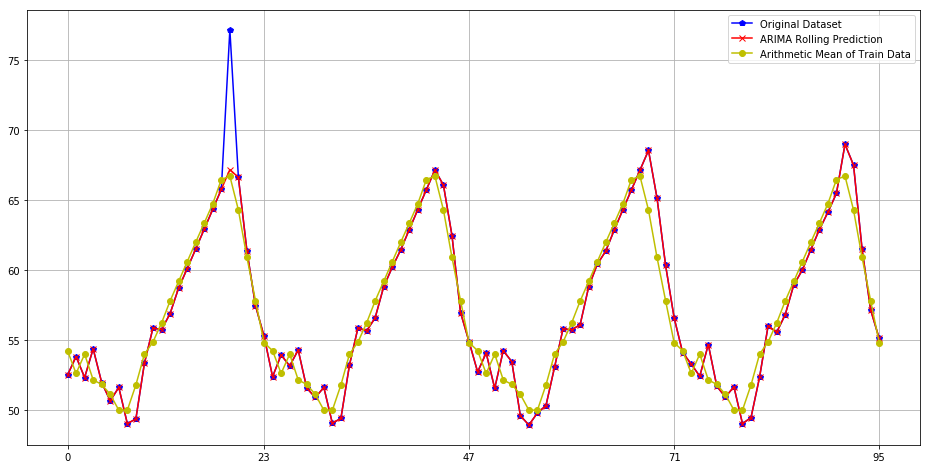

In [12]:
plt.figure(figsize=(16,8))
plt.plot(test_X, color='b',label='Original Dataset', marker='p')
plt.plot(predictions, color='r', label='ARIMA Rolling Prediction', marker='x')
plt.plot(meanDataTrain, color='y', label='Arithmetic Mean of Train Data', marker='o')
plt.xticks(numpy.array([0,23,47,71,95]))
plt.grid()
plt.legend(loc='best')
plt.show(block=False)

In [13]:
runData = numpy.array([numpy.array(predictions).ravel()]+[numpy.array(test_X).ravel()])

In [14]:
y = [1,2]

In [15]:
regrTest = RandomForestRegressor(n_estimators=2).fit(runData, y).feature_importances_*10
clfrTest = RandomForestClassifier(n_estimators=2).fit(runData, y).feature_importances_*10
ETrTest = ExtraTreesRegressor(n_estimators=2).fit(runData, y).feature_importances_*10
ETcTest = ExtraTreesClassifier(n_estimators=2).fit(runData, y).feature_importances_*10

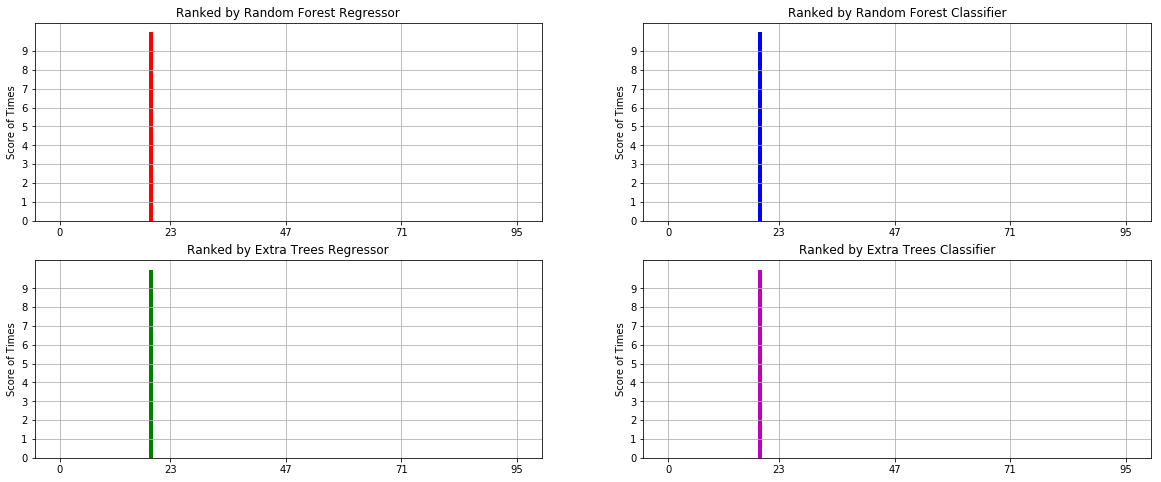

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.bar(range(96), regrTest, color='r')
plt.title('Ranked by Random Forest Regressor')
plt.ylabel('Score of Times')
plt.grid()
plt.xticks(numpy.array([0,23,47,71,95]))
plt.yticks(numpy.arange(len(range(10))))
plt.legend(loc='best')
plt.subplot(2,2,2)
plt.bar(range(96), clfrTest, color='b')
plt.title('Ranked by Random Forest Classifier')
plt.ylabel('Score of Times')
plt.grid()
plt.xticks(numpy.array([0,23,47,71,95]))
plt.yticks(numpy.arange(len(range(10))))
plt.legend(loc='best')
plt.subplot(2,2,3)
plt.bar(range(96), ETrTest, color='g')
plt.title('Ranked by Extra Trees Regressor')
plt.ylabel('Score of Times')
plt.grid()
plt.xticks(numpy.array([0,23,47,71,95]))
plt.yticks(numpy.arange(len(range(10))))
plt.legend(loc='best')
plt.subplot(2,2,4)
plt.bar(range(96), ETcTest, color='m')
plt.title('Ranked by Extra Trees Classifier')
plt.ylabel('Score of Times')
plt.grid()
plt.xticks(numpy.array([0,23,47,71,95]))
plt.yticks(numpy.arange(len(range(10))))
plt.legend(loc='best')
plt.show(block=False)

In [17]:
rolmeanPred = pandas.rolling_mean(runData[0], window=12, min_periods=1)
rolmeanTest = pandas.rolling_mean(runData[1], window=12, min_periods=1)

In [18]:
rolmeanModel = numpy.array([rolmeanPred,rolmeanTest])
#rolmeanModel = numpy.array([rolmeanPred,runData[1]])

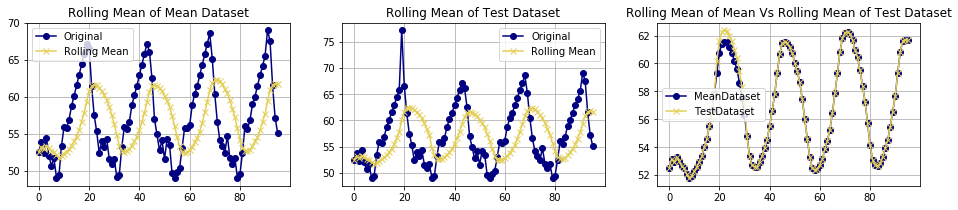

In [19]:
plt.figure(figsize=(16, 3))
plt.subplot(1,3,1)
plt.plot(runData[0], color='#000080',label='Original', marker='o')
plt.plot(rolmeanPred, color='#E3CF57', label='Rolling Mean', marker='x')
plt.legend(loc='best')
plt.grid()
plt.title('Rolling Mean of Mean Dataset')
plt.subplot(1,3,2)
plt.plot(runData[1], color='#000080',label='Original', marker='o')
plt.plot(rolmeanTest, color='#E3CF57', label='Rolling Mean', marker='x')
plt.legend(loc='best')
plt.grid()
plt.title('Rolling Mean of Test Dataset')
plt.subplot(1,3,3)
plt.plot(range(96), rolmeanPred, label='MeanDataset', color='#000080', marker='o')
plt.plot(range(96), rolmeanTest, label='TestDataset', color='#E3CF57',marker='x')
plt.grid()
plt.legend(loc='best')
plt.title('Rolling Mean of Mean Vs Rolling Mean of Test Dataset')
plt.show(block=False)

In [20]:
regrrolmeanModel = RandomForestRegressor(n_estimators=2).fit(rolmeanModel, y).feature_importances_*10
clfrrolmeanModel = RandomForestClassifier(n_estimators=2).fit(rolmeanModel, y).feature_importances_*10
ETrrolmeanModel = ExtraTreesRegressor(n_estimators=2).fit(rolmeanModel, y).feature_importances_*10
ETcrolmeanModel = ExtraTreesClassifier(n_estimators=2).fit(rolmeanModel, y).feature_importances_*10

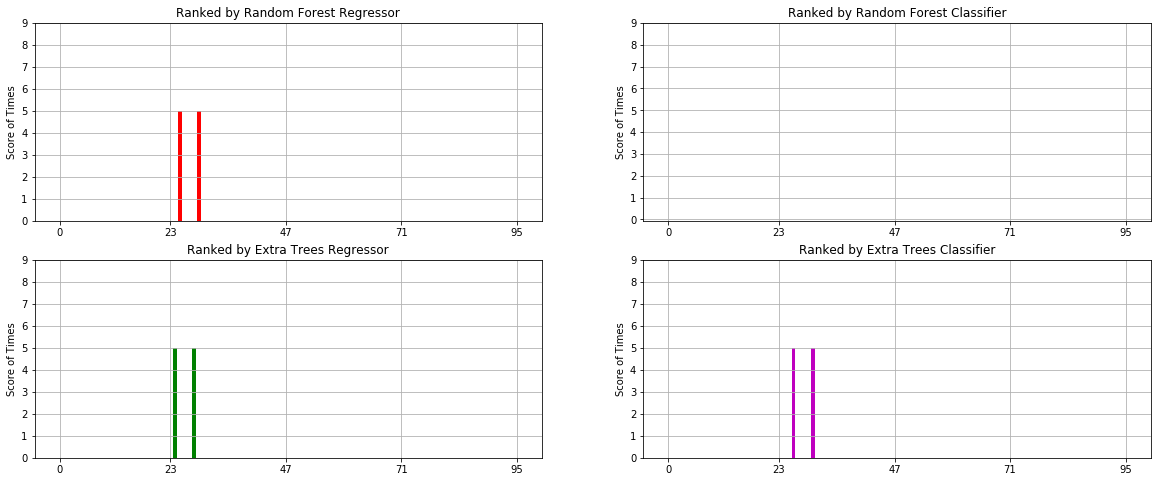

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.xticks(numpy.array([0,23,47,71,95]))
plt.bar(range(96), regrrolmeanModel, color='r')
plt.title('Ranked by Random Forest Regressor')
plt.ylabel('Score of Times')
plt.grid()
plt.yticks(numpy.arange(len(range(10))))
plt.legend(loc='best')
plt.subplot(2,2,2)
plt.xticks(numpy.array([0,23,47,71,95]))
plt.bar(range(96), clfrrolmeanModel, color='b')
plt.title('Ranked by Random Forest Classifier')
plt.ylabel('Score of Times')
plt.grid()
plt.yticks(numpy.arange(len(range(10))))
plt.legend(loc='best')
plt.subplot(2,2,3)
plt.xticks(numpy.array([0,23,47,71,95]))
plt.bar(range(96), ETrrolmeanModel, color='g')
plt.title('Ranked by Extra Trees Regressor')
plt.ylabel('Score of Times')
plt.grid()
plt.yticks(numpy.arange(len(range(10))))
plt.legend(loc='best')
plt.subplot(2,2,4)
plt.xticks(numpy.array([0,23,47,71,95]))
plt.bar(range(96), ETcrolmeanModel, color='m')
plt.title('Ranked by Extra Trees Classifier')
plt.ylabel('Score of Times')
plt.grid()
plt.yticks(numpy.arange(len(range(10))))
plt.legend(loc='best')
plt.show(block=False)